In [1]:
#import linraries
import spacy
from collections import Counter
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from spacy import displacy

In [2]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

# Load the English model
nlp = spacy.load("en_core_web_sm")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Dataset Selection
data = pd.read_csv('/content/drive/MyDrive/AAI520/MODULE2/climate-fever.csv')
print(data.head())

   claim_id                                              claim claim_label  \
0         0  Global warming is driving polar bears toward e...    SUPPORTS   
1         5  The sun has gone into ‘lockdown’ which could c...    SUPPORTS   
2         6        The polar bear population has been growing.     REFUTES   
3         9  Ironic' study finds more CO2 has slightly cool...     REFUTES   
4        10  Human additions of CO2 are in the margin of er...     REFUTES   

                    evidences/0/evidence_id evidences/0/evidence_label  \
0   Extinction risk from global warming:170            NOT_ENOUGH_INFO   
1                                Famine:386                   SUPPORTS   
2                           Polar bear:1332            NOT_ENOUGH_INFO   
3                    Atmosphere of Mars:131            NOT_ENOUGH_INFO   
4  Carbon dioxide in Earth's atmosphere:140            NOT_ENOUGH_INFO   

                    evidences/0/article  \
0   Extinction risk from global warming   


In [4]:
#Select one claim to complete NER and POS process before applying to complete dataset
#Clean data by removing stop words and punctuation
df = data['claim'].astype(str)
claim = df.iloc[638]

doc = nlp(claim)
sw = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

print('Original text: \n', claim)
print('\n Claim with stop words and punctuation removed: \n', sw)

Original text: 
 U.S. Forest Service data show pine beetle infestations have recently declined dramatically throughout the western United States.

 Claim with stop words and punctuation removed: 
 ['U.S.', 'Forest', 'Service', 'data', 'pine', 'beetle', 'infestations', 'recently', 'declined', 'dramatically', 'western', 'United', 'States']


In [5]:
#Apply NER to claim without stop words
text = ' '.join([str(elem) for elem in sw])
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]
print('NER results: \n', entities)

#Apply POS to claim without stop words
pos_tags = [(token.text, token.pos_) for token in doc]
print('\n POS tagging results: \n', pos_tags)

NER results: 
 [('U.S. Forest Service', 'ORG'), ('United States', 'GPE')]

 POS tagging results: 
 [('U.S.', 'PROPN'), ('Forest', 'PROPN'), ('Service', 'PROPN'), ('data', 'NOUN'), ('pine', 'NOUN'), ('beetle', 'NOUN'), ('infestations', 'NOUN'), ('recently', 'ADV'), ('declined', 'VERB'), ('dramatically', 'ADV'), ('western', 'ADJ'), ('United', 'PROPN'), ('States', 'PROPN')]


In [6]:
#Commented out due to printing difficulties to PDF

# Visualize the Named Entities
# displacy.render(doc, style='ent', jupyter=True)

# Visualize the POS Tags
# displacy.render(doc, style='dep', jupyter=True)

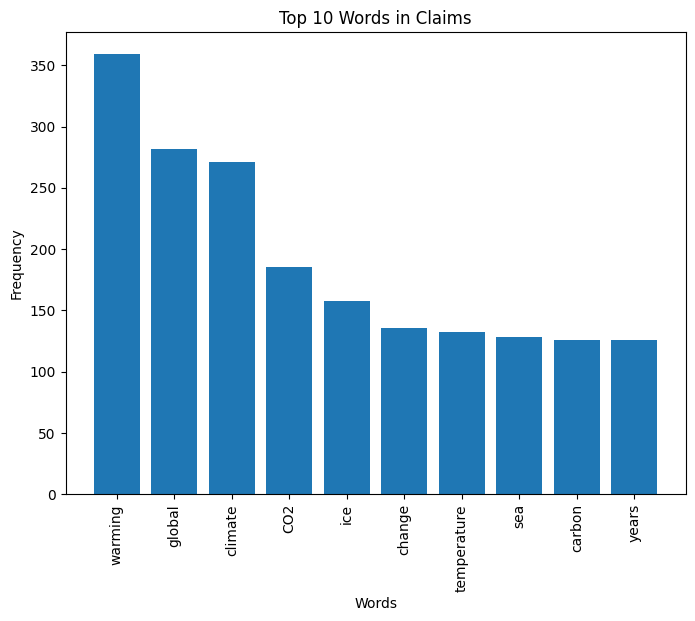

In [7]:
#Apply NER and POS tagging to whole claim dataset
#Start by tokenizing and removing stop words and punctuation
#Words = all individual words in the claims combined
#Claims = claims combined (same as df)
#All = all claims combined into one string
words = []
claims = []
for i in df:
  doc = nlp(i)
  sw = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
  text = ' '.join([str(elem) for elem in sw])
  claims.append(text)
  for j in sw:
    words.append(j)

all = ' '.join([str(elem) for elem in claims])

#Identify most frequent words
word_freq = Counter(words)
common_words = word_freq.most_common(10)

#Plot results
pairs = pd.DataFrame(common_words, columns=['Word','Frequency'])
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pairs['Word'], pairs['Frequency'])
ax.set_title('Top 10 Words in Claims')
ax.set_ylabel('Frequency')
ax.set_xlabel('Words')
plt.xticks(rotation=90)
plt.show()

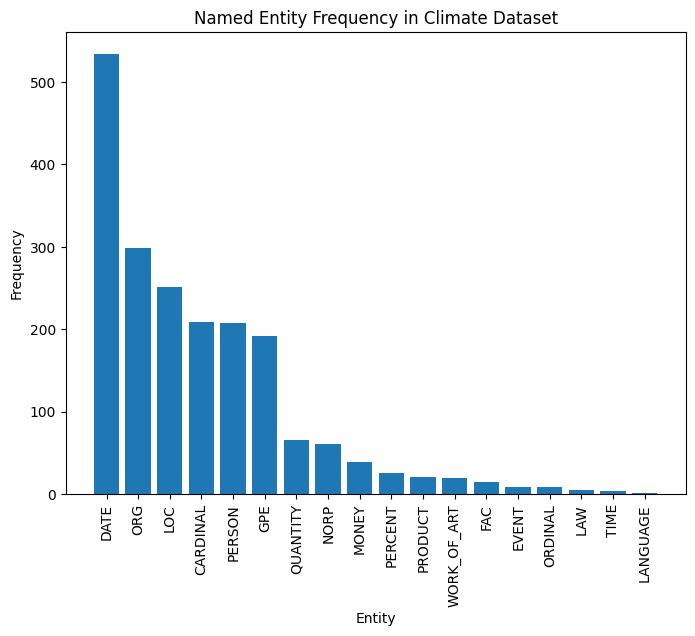

In [8]:
#Apply NER to clean dataset
#Plot the frequency of each entity in the claims
doc = nlp(all)
labels = [x.label_ for x in doc.ents]
ent_freq = Counter(labels)
common_ents = ent_freq.most_common()

pairs = pd.DataFrame(common_ents, columns=['Entity','Frequency'])
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pairs['Entity'], pairs['Frequency'])
ax.set_title('Named Entity Frequency in Climate Dataset')
ax.set_ylabel('Frequency')
ax.set_xlabel('Entity')
plt.xticks(rotation=90)
plt.show()

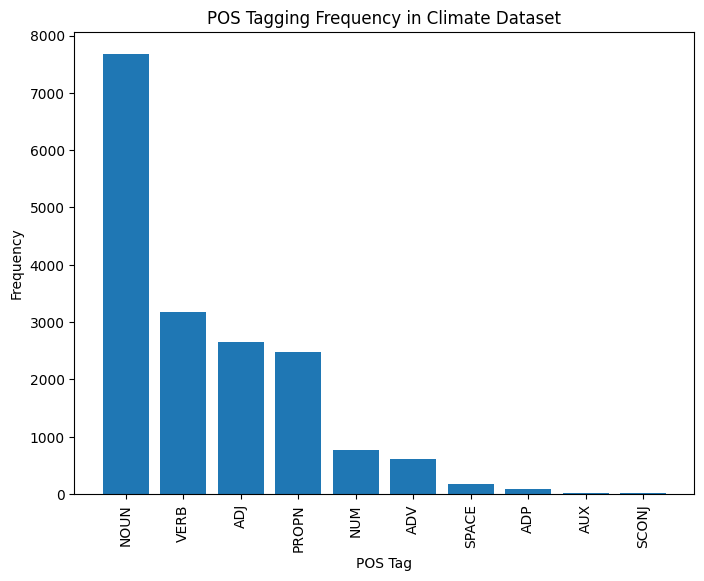

In [9]:
#Apply POS tagging to clean dataset
#Plot the frequency of each POS tag in the claims
tags = [x.pos_ for x in doc]
tag_freq = Counter(tags)
common_tag = tag_freq.most_common(10)

pairs = pd.DataFrame(common_tag, columns=['Tag','Frequency'])
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pairs['Tag'], pairs['Frequency'])
ax.set_title('POS Tagging Frequency in Climate Dataset')
ax.set_ylabel('Frequency')
ax.set_xlabel('POS Tag')
plt.xticks(rotation=90)
plt.show()